<a href="https://colab.research.google.com/github/Rushikeshghule24/Clustering/blob/main/EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
## Draw the inferences from the clusters obtained.


Hierarchical

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')

In [ ]:
air = pd.read_excel(xls,'data')

In [ ]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air.shape

(3999, 12)

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air.iloc[:,1:])

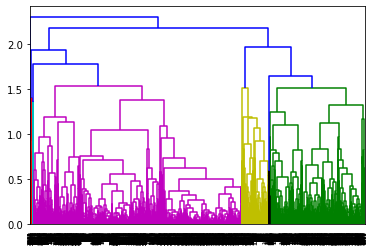

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [ ]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters


AgglomerativeClustering(n_clusters=5)

In [ ]:
y=pd.DataFrame(hclusters.fit_predict(df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
air['clustersid']=hclusters.labels_
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [ ]:
air.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1
1,1,1567.278932,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1
4,4,3390.846924,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0


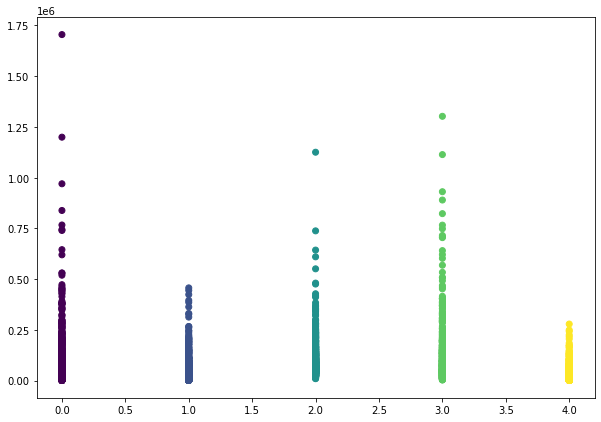

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air['clustersid'],air['Balance'], c=hclusters.labels_) 

## KMEANS

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [ ]:
xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')
air = pd.read_excel(xls,'data')

In [ ]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air=air.drop(['ID#'],axis=1)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
# Normalize heterogenous numerical data
air_norm=pd.DataFrame(normalize(air),columns=air.columns)
air_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [ ]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [ ]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)

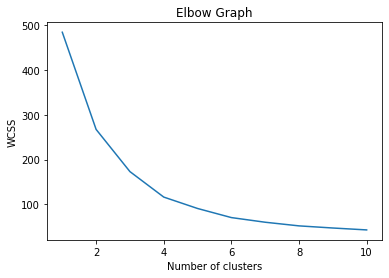

In [ ]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build Cluster algorithm using K=4

In [ ]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(air_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [ ]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [ ]:
# Assign clusters to the data set
air4=air.copy()
air4['clustersid']=clusters4.labels_
air4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [ ]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05],
       [8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06]])

In [ ]:
# Group data by Clusters (K=4)
air4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319,0
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099,1
2,2,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950,2
3,3,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064,3


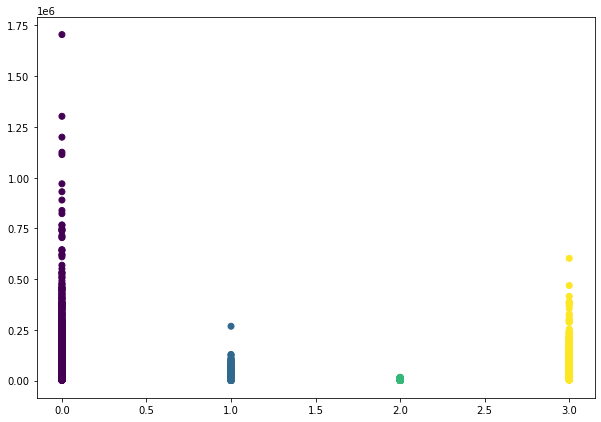

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air['clusters4id'],air4['Balance'], c=clusters4.labels_) 

Build Cluster algorithm using K=5

In [ ]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(air_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [ ]:
clusters5.labels_

array([0, 3, 0, ..., 4, 0, 3], dtype=int32)

In [ ]:
# Assign clusters to the data set
air5=air.copy()
air5['clusters5id']=clusters5.labels_
air5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id,clustersid,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,3,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3,3,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [ ]:
clusters5.cluster_centers_

array([[9.87581993e-01, 3.39051837e-03, 3.51053916e-05, 3.03791237e-05,
        3.02652033e-05, 9.01709733e-02, 1.53701634e-04, 6.66013521e-03,
        2.09767345e-05, 7.53291184e-02, 3.94536689e-06],
       [5.14758999e-01, 2.45703304e-03, 9.55752981e-05, 5.00781670e-05,
        4.87710513e-05, 8.02358706e-01, 5.20472068e-04, 1.80244812e-02,
        6.06430623e-05, 1.36539353e-01, 3.06234744e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [8.93103634e-01, 4.45303855e-03, 1.23796982e-04, 1.23612826e-04,
        1.23612826e-04, 7.60122618e-02, 2.95169039e-04, 6.30476783e-03,
        2.07480658e-05, 4.07515394e-01, 1.35161631e-05],
       [8.91833807e-01, 2.00098101e-03, 5.80553278e-05, 3.01489923e-05,
        2.94377607e-05, 4.20637046e-01, 4.04859493e-04, 7.68892416e-03,
        2.27011475e-05, 8.30834166e-02, 1.00407121e-

In [ ]:
# Group data by Clusters (K=5)
air5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374,0.114846,0.114846
1,1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409,1.008523,1.008523
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,2.000000,2.000000
3,3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680,0.791237,0.791237
4,4,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054,2.970179,2.970179


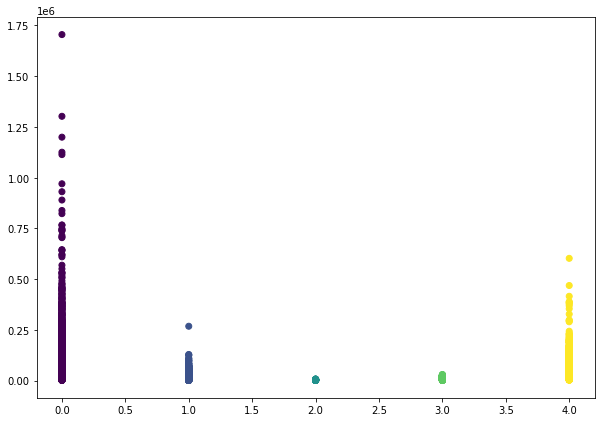

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air5['clusters5id'],air5['Balance'], c=clusters5.labels_)

DBSCAN

In [ ]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')
air = pd.read_excel(xls,'data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
print(air.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  clusters4id        3999 non-null   int32
 12  clustersid         3999 non-null   int32
dtypes: int32(2), int64(11)
memory usage: 375.0 KB
None


In [ ]:
air=air.drop(['ID#'],axis=1)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
array=air.values

In [ ]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [103]:
pd.concat([air,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
